In [1]:
# Install PyTorch with GPU support (CUDA 11.8 version)
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

import torch
print("CUDA Available:", torch.cuda.is_available())  # Should be True
print("GPU:", torch.cuda.get_device_name(0))  # Should print Quadro RTX 4000

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


CUDA Available: True
GPU: Quadro RTX 4000


In [2]:
%pip install -U "transformers[torch]"
%pip install -U datasets accelerate evaluate sacrebleu sentencepiece protobuf rouge_score bert_score tensorboard

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl (435 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast, DataCollatorForSeq2Seq
from datasets import load_dataset

d:\CS-2019-063\mbart50\mbart50-env-1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
%pip install sentencepiece protobuf
%pip install tiktoken

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
model_name = "facebook/mbart-large-50-many-to-many-mmt"
tokenizer = MBart50TokenizerFast.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)

tokenizer.src_lang = "si_LK"
tokenizer.tgt_lang = "ta_IN"

In [6]:
from datasets import load_dataset

dataset = load_dataset(
    "csv",
    data_files={
        "train": "data/train-new.tsv",
        "validation": "data/val-new.tsv",
        # "test": "test.tsv"
    },
    delimiter="\t",  # TSV format
    column_names=["target", "source"]  # Only needed if your files don't have headers
)

# Example usage
print("Train Sample:", dataset["train"][1])
print("Validation Sample:", dataset["validation"][1])
# print("Test Sample:", dataset["test"][1])

Train Sample: {'target': 'எனது ஆகக்கூடிய பங்களிப்பை நான் தலைவருக்கு வழங்குவேன்  என டில்ஷான் மேலும் குறிப்பிட்டார் .', 'source': ' මගේ උපරිමය මම නව නායකයාට ලබාදෙනවා.  යනුවෙන් ඩිල්ෂාන් වැඩිදුරටත් පැවසීය .'}
Validation Sample: {'target': 'தாக்குதலின் இலக்கை தெரிவு செய்வது மூலமாக , அதை வெற்றிகரமாக திட்டமிட்டு செயற்படுத்துதலும் முக்கியமானதாகும் .', 'source': 'ප්රහාරයේ ඉලක්කය තෝරා ගැනීමෙන් එය සාර්ථකව සැලසුම්කොට ක්රියාත්මක කිරීමත් වැදගත්ය .'}


In [7]:
%pip uninstall tensorflow -y
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl (375.7 MB)
  Using cached ml_dtypes-0.5.1-cp310-cp310-win_amd64.whl (209 kB)
  Using cached protobuf-5.29.5-cp310-abi3-win_amd64.whl (434 kB)
  Using cached h5py-3.14.0-cp310-cp310-win_amd64.whl (2.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)
  Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached rich-14.0.0-py3-none-any.whl (243 kB)
  Using cached optree-0.16.0-cp310-cp310-win_amd64.whl (304 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\CS-2019-063\\mbart50\\mbart50-env-1\\Lib\\site-packages\\google\\~=pb\\_message.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Preprocess the dataset
def preprocess_function(examples):
    inputs = [ex for ex in examples["source"]]  # Source: Sinhala
    targets = [ex for ex in examples["target"]]  # Target: Tamil
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)
   
    # Tokenize target language
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
   
    return model_inputs

# Apply preprocessing
tokenized_datasets = dataset.map(preprocess_function, batched=True)

In [9]:
%pip install -U "transformers[torch]"
%pip install -U "accelerate>=0.26.0"

%pip install sacrebleu
%pip install evaluate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from transformers import TrainerCallback
import os


class SavePerEpochCallback(TrainerCallback):
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer


    def on_epoch_end(self, args, state, control, **kwargs):
        epoch_dir = os.path.join(args.output_dir, f"epoch_{int(state.epoch)}_model")
        os.makedirs(epoch_dir, exist_ok=True)
        kwargs["model"].save_pretrained(epoch_dir)
        self.tokenizer.save_pretrained(epoch_dir)
        return control


In [11]:
! pip install rouge_score

! pip install bert_score



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from evaluate import load
import numpy as np
import torch


bleu = load("sacrebleu")
rouge = load("rouge")
chrf = load("chrf")
bart_score = load("bertscore")  # No direct "bartscore", use bertscore or integrate external lib


def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)


    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)


    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)


    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    rouge_result = rouge.compute(predictions=decoded_preds, references=[l[0] for l in decoded_labels])
    chrf_result = chrf.compute(predictions=decoded_preds, references=decoded_labels)
    bertscore_result = bart_score.compute(predictions=decoded_preds, references=[l[0] for l in decoded_labels], lang="si")


    # Exact Match
    em = np.mean([p == l[0] for p, l in zip(decoded_preds, decoded_labels)])


    # Token Accuracy
    total = correct = 0
    for pred, label in zip(decoded_preds, decoded_labels):
        pred_tokens = pred.split()
        label_tokens = label[0].split()
        total += len(label_tokens)
        correct += sum([p == l for p, l in zip(pred_tokens, label_tokens)])
    token_acc = correct / total if total > 0 else 0


    return {
        "bleu": bleu_result["score"],
        "rougeL": rouge_result["rougeL"],
        "chrf": chrf_result["score"],
        "exact_match": em,
        "token_accuracy": token_acc,
        "bertscore_f1": np.mean(bertscore_result["f1"])
    }


In [13]:
%pip install transformers[torch]
%pip install --upgrade accelerate
%pip install --upgrade "accelerate>=0.26.0"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

training_args = Seq2SeqTrainingArguments(
    output_dir="./outputs_si_ta",
    eval_strategy="epoch",
    save_strategy = "epoch",
    # save_strategy="steps",       # save checkpoints every fixed number of steps

    save_steps=3,              # save checkpoint every 500 training steps
    save_total_limit=3,
    load_best_model_at_end = True,
    metric_for_best_model = "bleu",
    greater_is_better=True,

    logging_dir="./logs",
    logging_steps=5,

    num_train_epochs=5,
    learning_rate=5e-5,
    warmup_steps=500,
    lr_scheduler_type="linear",  # inside Seq2SeqTrainingArguments
    optim="adafactor",

    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,

    predict_with_generate=True,
    fp16=True,  # True if you have GPU
    report_to="tensorboard",
    weight_decay=0.01,
    overwrite_output_dir=True,
    max_grad_norm=1.0,

)

In [15]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast, DataCollatorForSeq2Seq
from transformers import EarlyStoppingCallback

#  Data collator for padding and batching
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[SavePerEpochCallback(tokenizer), EarlyStoppingCallback(early_stopping_patience=2)]
)

C:\Users\FCT\AppData\Local\Temp\ipykernel_4908\2888177122.py:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [16]:
trainer.train(resume_from_checkpoint=True)

There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


Epoch,Training Loss,Validation Loss,Bleu,Rougel,Chrf,Exact Match,Token Accuracy,Bertscore F1
5,0.707600,1.666949,11.155844,0.063196,52.052237,0.003750,0.194396,0.837439


d:\CS-2019-063\mbart50\mbart50-env-1\lib\site-packages\transformers\modeling_utils.py:3685: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 200, 'early_stopping': True, 'num_beams': 5}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
That's 100 lines that end in a tokenized period ('.')
It looks like you forgot to detokenize your test data, which may hurt your score.
If you insist your data is detokenized, or don't care, you can suppress this message with the `force` parameter.
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=14250, training_loss=0.11499000930786132, metrics={'train_runtime': 7349.2765, 'train_samples_per_second': 31.019, 'train_steps_per_second': 1.939, 'total_flos': 1.9351624408940544e+16, 'train_loss': 0.11499000930786132, 'epoch': 5.0})

In [17]:
# trainer.train()
# trainer.train(resume_from_checkpoint=True)

In [18]:
# trainer.train()

In [19]:
# trainer.train(resume_from_checkpoint="2.results_ta_si/checkpoint-1191")

In [20]:
# Save final model
trainer.save_model("./final_model_si_ts-test")
tokenizer.save_pretrained("./final_model_si_ta-test")

('./final_model_si_ta-test\\tokenizer_config.json',
 './final_model_si_ta-test\\special_tokens_map.json',
 './final_model_si_ta-test\\sentencepiece.bpe.model',
 './final_model_si_ta-test\\added_tokens.json',
 './final_model_si_ta-test\\tokenizer.json')

In [21]:
print("Pad token:", tokenizer.pad_token)
print("BOS token:", tokenizer.bos_token)
print("EOS token:", tokenizer.eos_token)
print("Language codes:", tokenizer.lang_code_to_id)

Pad token: <pad>
BOS token: <s>
EOS token: </s>
Language codes: {'ar_AR': 250001, 'cs_CZ': 250002, 'de_DE': 250003, 'en_XX': 250004, 'es_XX': 250005, 'et_EE': 250006, 'fi_FI': 250007, 'fr_XX': 250008, 'gu_IN': 250009, 'hi_IN': 250010, 'it_IT': 250011, 'ja_XX': 250012, 'kk_KZ': 250013, 'ko_KR': 250014, 'lt_LT': 250015, 'lv_LV': 250016, 'my_MM': 250017, 'ne_NP': 250018, 'nl_XX': 250019, 'ro_RO': 250020, 'ru_RU': 250021, 'si_LK': 250022, 'tr_TR': 250023, 'vi_VN': 250024, 'zh_CN': 250025, 'af_ZA': 250026, 'az_AZ': 250027, 'bn_IN': 250028, 'fa_IR': 250029, 'he_IL': 250030, 'hr_HR': 250031, 'id_ID': 250032, 'ka_GE': 250033, 'km_KH': 250034, 'mk_MK': 250035, 'ml_IN': 250036, 'mn_MN': 250037, 'mr_IN': 250038, 'pl_PL': 250039, 'ps_AF': 250040, 'pt_XX': 250041, 'sv_SE': 250042, 'sw_KE': 250043, 'ta_IN': 250044, 'te_IN': 250045, 'th_TH': 250046, 'tl_XX': 250047, 'uk_UA': 250048, 'ur_PK': 250049, 'xh_ZA': 250050, 'gl_ES': 250051, 'sl_SI': 250052}


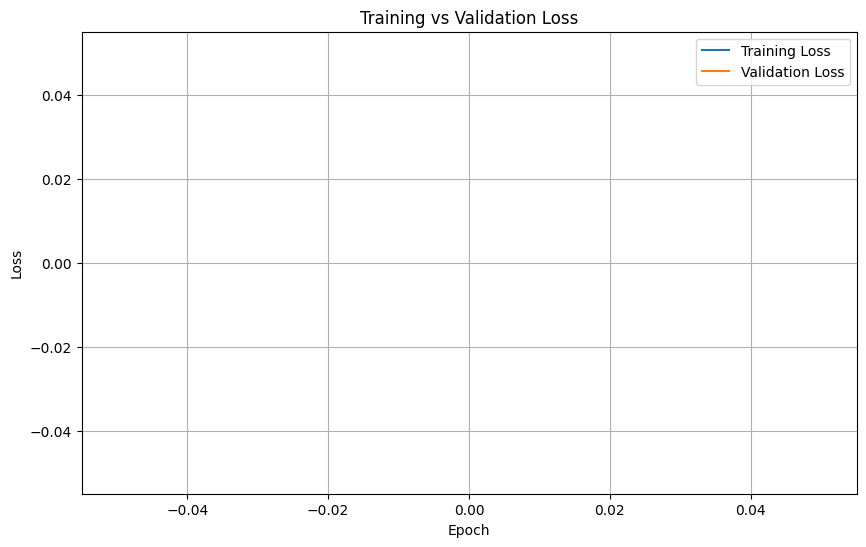

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

log_history = trainer.state.log_history
df_log = pd.DataFrame(log_history)

# Filter relevant logs
df_log = df_log[["epoch", "loss", "eval_loss"]].dropna()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_log["epoch"], df_log["loss"], label="Training Loss")
plt.plot(df_log["epoch"], df_log["eval_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
if "learning_rate" in df_log.columns:
    plt.plot(df_log["epoch"], df_log["learning_rate"], label="Learning Rate")
    plt.xlabel("Epoch")
    plt.ylabel("LR")
    plt.title("Learning Rate Over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()


In [24]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

writer.add_scalar("Loss/train", train_loss, epoch)
writer.add_scalar("Loss/validation", val_loss, epoch)
writer.add_scalar("WER", wer, epoch)
writer.close()

NameError: name 'train_loss' is not defined